# Exploring Species Lists

The code below loads the Python libraries we need

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The code below loads the data. There are three separate files: one contains the species and records data, another contains the geographic data, and the last contains the WWF ecoregion data. The geonames id is used as the index. The last line creates a new column of data about the number of ecoregions in each country and adds it to the species/records data set.

In [52]:
df = pd.read_table('species_counts.tsv', sep='\t', header=0, index_col=3, dtype={'country_s':str, '#_Records':np.float64, '#_Species':np.float64, 'geonames_id':np.int32})
geo = pd.read_table('geography_data.txt', sep ='\t', header=0, index_col=1, dtype={'country_g':str, 'geonames_id':np.int32, 'area_km2':np.float64, 'percent_water':np.float64, 'population_density':np.float64, 'gdp_nominal':np.float64, 'gdp_ppp':np.float64, 'gini':np.float64, 'hdi':np.float64})
eco = pd.read_table('ecoregions.tsv', sep='\t', header=0, dtype={'domain':str, 'ecozone':str, 'biome':str, 'ecoregion':str, 'country_e':str, 'geonames_id':np.int32})
tax = pd.read_table('taxon_data.txt', sep='\t', header=0, dtype={'country_t':str, 'geonames_id':np.int32, 'family':str, 'records':np.int32})
df['#_ecoregions'] = eco['geonames_id'].value_counts()
df['#_families'] = tax['geonames_id'].value_counts()

The code below joins the species/records data with the geographic data. Then we create new columns to get the records per km2, records per species, and species per km2. Then we output the countries with the highest and lowest number of records, number of species, records per area, species per area, and records per species.

In [53]:
#join the data
all_data = pd.concat([df, geo], axis=1, join_axes=[df.index])

#here I was trying to learn more about ecoregions. I think I need to include freshwater and marine ecoregions before
#I can proceed.
#h = all_data.loc[all_data['#_ecoregions'] == 1.0]
#print(h.loc[h['percent_water'] == 0])

#create the new columns
all_data['records_per_area'] = all_data['#_Records']/all_data['area_km2']
all_data['records_per_species'] = all_data['#_Records']/all_data['#_Species']
all_data['species_per_area'] = all_data['#_Species']/all_data['area_km2']
all_data['records_per_ecoregion'] = all_data['#_Records']/all_data['#_ecoregions']
all_data['species_per_ecoregion'] = all_data['#_Species']/all_data['#_ecoregions']
#print(all_data.nlargest(10, 'species_per_area'))

conditions = [(all_data['records_per_area'] > 999),
              (all_data['records_per_area'] < 1000) & (all_data['records_per_area'] > 499),
             (all_data['records_per_area'] < 500) & (all_data['records_per_area'] > 99),
             (all_data['records_per_area'] < 100) & (all_data['records_per_area'] > 9),
             (all_data['records_per_area'] < 10) & (all_data['records_per_area'] > 0.9),
             (all_data['records_per_area'] < 1) & (all_data['records_per_area'] > 0.1),
             (all_data['records_per_area'] < 0.1) & (all_data['records_per_area'] < 0.01),
             (all_data['records_per_area'] < 0.01)]
choices = [1, 2, 3, 4, 5, 6, 7, 8]
all_data['record_category'] = np.select(conditions, choices, default=0)

#find the country with the largest value
a = all_data.nlargest(1, '#_Records')
b = all_data.nlargest(1, '#_Species')
c = all_data.nlargest(1, 'records_per_area')
d = all_data.nlargest(1, 'records_per_species')
e = all_data.nlargest(1, 'species_per_area')
f = all_data.nlargest(1, 'records_per_ecoregion')
g = all_data.nlargest(1, 'species_per_ecoregion')

#output the answer
print('The country with the most records is ' + a.iloc[0]['country_s'] + ' with ' + str(a.iloc[0]['#_Records']))
print('The country with the most species is ' + b.iloc[0]['country_s'] + ' with ' + str(b.iloc[0]['#_Species']))
print('The country with the most records per square km is ' + c.iloc[0]['country_s'] + ' with ' + str(c.iloc[0]['records_per_area']))
print('The country with the most records per species is ' + d.iloc[0]['country_s'] + ' with ' + str(d.iloc[0]['records_per_species']))
print('The country with the most species per square km is ' + e.iloc[0]['country_s'] + ' with ' + str(e.iloc[0]['species_per_area']))
print('The country with the most records per ecoregion is ' + f.iloc[0]['country_s'] + ' with ' + str(f.iloc[0]['records_per_ecoregion']))
print('The country with the most species per ecoregion is ' + g.iloc[0]['country_s'] + ' with ' + str(g.iloc[0]['species_per_ecoregion']))
print('\n')

#find the country with the smallest result
a = all_data.nsmallest(1, '#_Records')
b = all_data.nsmallest(1, '#_Species')
c = all_data.nsmallest(1, 'records_per_area')
d = all_data.nsmallest(1, 'records_per_species')
e = all_data.nsmallest(1, 'species_per_area')
f = all_data.nsmallest(1, 'records_per_ecoregion')
g = all_data.nsmallest(1, 'species_per_ecoregion')

#output the answer
print('The country with the least records is ' + a.iloc[0]['country_s'] + ' with ' + str(a.iloc[0]['#_Records']))
print('The country with the fewest species is ' + b.iloc[0]['country_s'] + ' with ' + str(b.iloc[0]['#_Species']))
print('The country with the least records per square km is ' + c.iloc[0]['country_s'] + ' with ' + str(c.iloc[0]['records_per_area']))
print('The country with the least records per species is ' + d.iloc[0]['country_s'] + ' with ' + str(d.iloc[0]['records_per_species']))
print('The country with the least species per square km is ' + e.iloc[0]['country_s'] + ' with ' + str(e.iloc[0]['species_per_area']))
print('The country with the least records per ecoregion is ' + f.iloc[0]['country_s'] + ' with ' + str(f.iloc[0]['records_per_ecoregion']))
print('The country with the least species per ecoregion is ' + g.iloc[0]['country_s'] + ' with ' + str(g.iloc[0]['species_per_ecoregion']))

The country with the most records is Sweden with 82325554.0
The country with the most species is Brazil with 90249.0
The country with the most records per square km is Bermuda with 1385.26315789
The country with the most records per species is Sweden with 1685.34134458
The country with the most species per square km is Vatican City with 111.363636364
The country with the most records per ecoregion is Netherlands with 18013706.0
The country with the most species per ecoregion is Netherlands with 24306.0


The country with the least records is Tokelau with 1.0
The country with the fewest species is Tokelau with 1.0
The country with the least records per square km is South Sudan with 0.00221704087972
The country with the least records per species is Tokelau with 1.0
The country with the least species per square km is Libya with 0.000559805085531
The country with the least records per ecoregion is Tokelau with 1.0
The country with the least species per ecoregion is Tokelau with 1.0


This plot shows the number of records vs the number of species. It kind of looks like the number of species saturates at around 20 million records. The two outliers with really high species counts are Brazil and Mexico. The countries with the two highest records counts are the United States and Sweden. I need to look at the taxa that are being sampled here too. This trend might be entirely driven by birds.

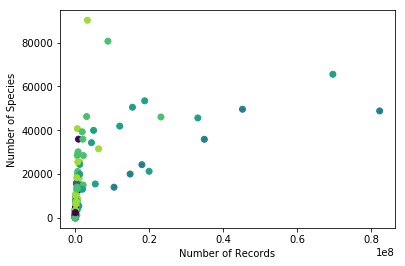

In [74]:
plt.scatter(all_data['#_Records'], all_data['#_Species'], c=all_data['record_category'])
plt.xlabel('Number of Records')
plt.ylabel('Number of Species')
#plt.xlim(0.0, 2000000)
#plt.ylim(0, 40000)
plt.show()

The code below plots area in km2 vs Number of records. Interesting that the largest countries do not have the most records. The largest is Russia. The countries with the most records are Sweden and the United States.

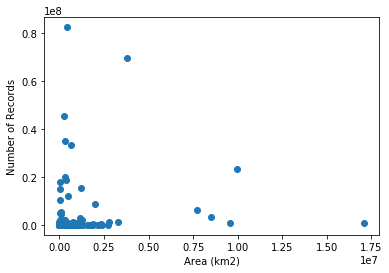

In [55]:
plt.scatter(all_data['area_km2'], all_data['#_Records'])
plt.xlabel('Area (km2)')
plt.ylabel('Number of Records')
plt.show()

This code plots records per km2 vs species per km2. I'm not sure what it means yet, if anything. I probably need to investigate the ecoregions for this to make sense.

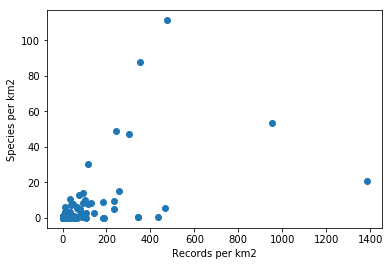

In [56]:
plt.scatter(all_data['records_per_area'], all_data['species_per_area'])
plt.xlabel('Records per km2')
plt.ylabel('Species per km2')
plt.show()

This code plots records per species vs number of species. It looks like the number of species saturates at around 250-500 records per species. Again the two countries with the most species are Brazil and Mexico.

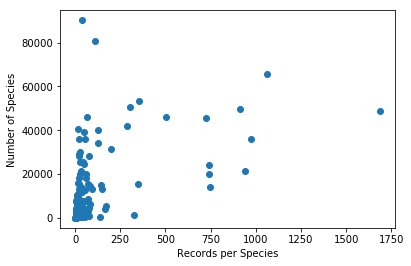

In [57]:
plt.scatter(all_data['records_per_species'], all_data['#_Species'])
plt.xlabel('Records per Species')
plt.ylabel('Number of Species')
plt.show()

This code plots GDP PPP Per capita (USD) vs records per km2. It shows that the richest countries are not the ones that are the most heavily sampled.

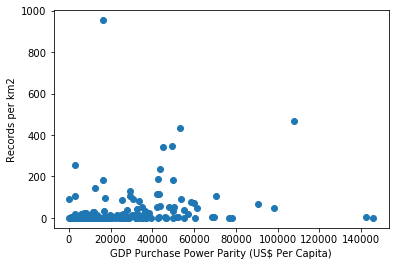

In [58]:
plt.scatter(all_data['gdp_ppp'], all_data['records_per_area'])
plt.xlabel('GDP Purchase Power Parity (US$ Per Capita)')
plt.ylabel('Records per km2')
plt.show()

This code plots the Human Development Index vs records per km2. It suggests that more developed countries get more attention.

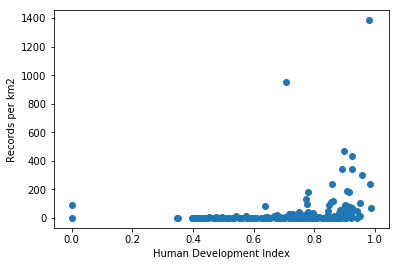

In [59]:
plt.scatter(all_data['hdi'], all_data['records_per_area'])
plt.xlabel('Human Development Index')
plt.ylabel('Records per km2')
plt.show()

This code plots Human Development Index vs number of species. It reinforces the plot above. The places with HDI=0 are uninhabited islands.

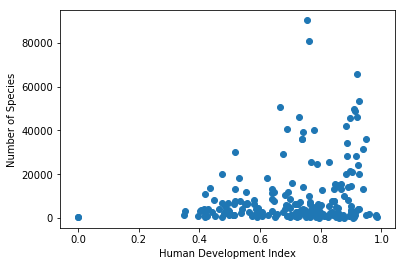

In [60]:
plt.scatter(all_data['hdi'], all_data['#_Species'])
plt.xlabel('Human Development Index')
plt.ylabel('Number of Species')
plt.show()

This code plots percent area that is water vs species per area. It looks like drier places have more species reported. Could be an interesting sampling artifact.

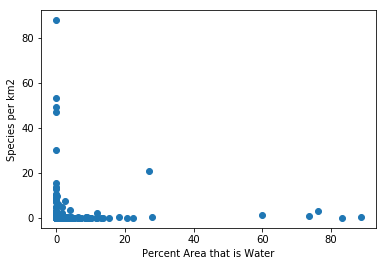

In [61]:
plt.scatter(all_data['percent_water'], all_data['species_per_area'])
plt.xlabel('Percent Area that is Water')
plt.ylabel('Species per km2')
plt.show()

This code plots area (km2) vs species per area. I wanted to look at this because I suspected that smaller islands (especially tropical islands) were very well sampled and thus many species have been reported. It looks like that's the case. 

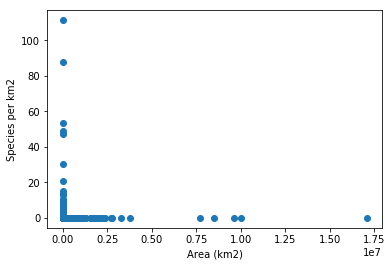

In [62]:
plt.scatter(all_data['area_km2'], all_data['species_per_area'])
plt.xlabel('Area (km2)')
plt.ylabel('Species per km2')
plt.show()

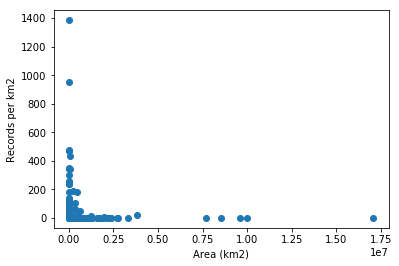

In [63]:
plt.scatter(all_data['area_km2'], all_data['records_per_area'])
plt.xlabel('Area (km2)')
plt.ylabel('Records per km2')
plt.show()

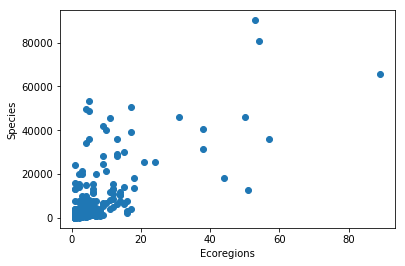

In [64]:
plt.scatter(all_data['#_ecoregions'], all_data['#_Species'])
plt.xlabel('Ecoregions')
plt.ylabel('Species')
plt.show()

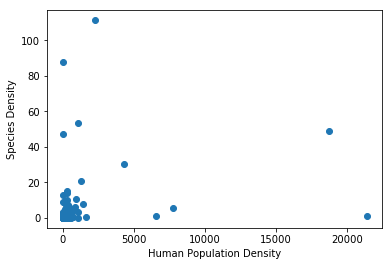

In [65]:
plt.scatter(all_data['population_density'], all_data['species_per_area'])
plt.xlabel('Human Population Density')
plt.ylabel('Species Density')
plt.show()

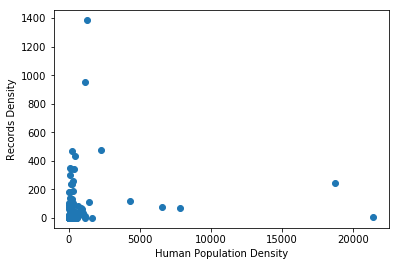

In [66]:
plt.scatter(all_data['population_density'], all_data['records_per_area'])
plt.xlabel('Human Population Density')
plt.ylabel('Records Density')
plt.show()

In [67]:
m = tax['records'].groupby(tax['geonames_id']).idxmax()
tax.iloc[m[:250]]    

,country,geonames_id,family,records
135818,Rwanda,49518,Muridae,8611
143903,Somalia,51537,Poaceae,1579
182611,Yemen,69543,Poaceae,5446
73784,Iraq,99237,Poaceae,2684
137516,Saudi_Arabia,102358,Muscicapidae,5327
72918,Iran,130758,Poaceae,11344
35589,Cyprus,146669,Fabaceae,1115
160150,Tanzania,149590,Muridae,33584
158046,Syria,163843,Fabaceae,19858
5272,Armenia,174982,Lacertidae,3632


In [68]:
m = tax.groupby('geonames_id')
m.sum()

,records
geonames_id,
49518,46319
51537,15461
69543,20913
99237,17431
102358,61458
130758,133893
146669,16059
149590,559207
163843,39992


In [69]:
p = tax['records'].groupby(tax['family']).sum() 
p.sort_values()

family
Diamantomyidae               1
Gasterocomidae               1
Gallodactylidae              1
Ascoideaceae                 1
Gallinuloididae              1
Galeopsidae                  1
Galechiridae                 1
Askeptosauridae              1
Philogeniidae                1
Philosinidae                 1
Phlegethontiidae             1
Phasmomimidae                1
Frontipodopsidae             1
Phragmorthidae               1
Fortiforcipidae              1
Tiarechinidae                1
Tianzhushanellidae           1
Phycolepidoziaceae           1
Asterolecaniidae             1
Asterotexaceae               1
Ferreiraellidae              1
Ferganoceratidae             1
Farcidae                     1
Phragmocoeliidae             1
Thylacosmilidae              1
Gastrothylacidae             1
Gelasopteridae               1
Peltopleuridae               1
Archeriidae                  1
Archijassidae                1
                        ...   
Plantaginaceae         4705945
B

In [70]:
birds = ['Acanthisittidae','Acanthizidae','Accipitridae','Acrocephalidae','Aegithalidae','Aegithinidae','Aegothelidae','Alaudidae','Alcedinidae','Alcidae','Anatidae','Anhimidae','Anhingidae','Anseranatidae','Apodidae','Apterygidae','Aramidae','Arcanatoridae','Ardeidae','Artamidae','Atrichornithidae','Balaenicipitidae','Bernieridae','Bombycillidae','Brachypteraciidae','Bucconidae','Bucerotidae','Bucorvidae','Buphagidae','Burhinidae','Cacatuidae','Calcariidae','Callaeidae','Calyptophilidae','Campephagidae','Capitonidae','Caprimulgidae','Cardinalidae','Cariamidae','Casuariidae','Cathartidae','Certhiidae','Cettiidae','Chaetopidae','Charadriidae','Chionidae','Chloropseidae','Ciconiidae','Cinclidae','Cisticolidae','Climacteridae','Cnemophilidae','Coliidae','Columbidae','Conopophagidae','Coraciidae','Corcoracidae','Corvidae','Cotingidae','Cracidae','Cuculidae','Dasyornithidae','Dicaeidae','Dicruridae','Diomedeidae','Donacobiidae','Dromadidae','Dulidae','Elachuridae','Emberizidae','Erythrocercidae','Estrildidae','Eulacestomatidae','Eupetidae','Eurylaimidae','Eurypygidae','Falconidae','Formicariidae','Fregatidae','Fringillidae','Furnariidae','Galbulidae','Gaviidae','Glareolidae','Grallariidae','Gruidae','Haematopodidae','Heliornithidae','Hemiprocnidae','Hirundinidae','Hydrobatidae','Hyliotidae','Hylocitreidae','Hypocoliidae','Ibidorhynchidae','Icteridae','Icteriidae','Ifritidae','Indicatoridae','Irenidae','Jacanidae','Laniidae','Laridae','Leiothrichidae','Leptosomidae','Locustellidae','Lybiidae','Machaerirhynchidae','Macrosphenidae','Malaconotidae','Maluridae','Megalaimidae','Megapodiidae','Melampittidae','Melanocharitidae','Melanopareiidae','Meliphagidae','Menuridae','Meropidae','Mesitornithidae','Mimidae','Mitrospingidae','Mohoidae','Mohouidae','Momotidae','Monarchidae','Motacillidae','Muscicapidae','Musophagidae','Nectariniidae','Neosittidae','Nesospingidae','Nicatoridae','Notiomystidae','Numididae','Nyctibiidae','Oceanitidae','Odontophoridae','Opisthocomidae','Oreoicidae','Oriolidae','Orthonychidae','Otididae','Pachycephalidae','Pandionidae','Panuridae','Paradisaeidae','Paramythiidae','Pardalotidae','Paridae','Parulidae','Passerellidae','Passeridae','Pedionomidae','Pelecanidae','Pellorneidae','Petroicidae','Peucedramidae','Phaenicophilidae','Phaethontidae','Phalacrocoracidae','Phasianidae','Phoenicopteridae','Phoeniculidae','Phylloscopidae','Picathartidae','Picidae','Pipridae','Pittidae','Pityriaseidae','Platysteiridae','Ploceidae','Pluvianellidae','Pluvianidae','Pnoepygidae','Podargidae','Podicipedidae','Polioptilidae','Pomatostomidae','Prionopidae','Procellariidae','Promeropidae','Prunellidae','Psittacidae','Psittaculidae','Psophiidae','Psophodidae','Pteroclidae','Ptiliogonatidae','Ptilonorhynchidae','Pycnonotidae','Rallidae','Ramphastidae','Recurvirostridae','Regulidae','Remizidae','Rhagologidae','Rheidae','Rhinocryptidae','Rhipiduridae','Rhodinocichlidae','Rhynochetidae','Rostratulidae','Sagittariidae','Sapayoidae','Sarothruridae','Scolopacidae','Scopidae','Scotocercidae','Semnornithidae','Sittidae','Spheniscidae','Spindalidae','Steatornithidae','Stenostiridae','Stercorariidae','Strigidae','Strigopidae','Struthionidae','Sturnidae','Sulidae','Sylviidae','Tephrodornithidae','Teretistridae','Thamnophilidae','Thinocoridae','Thraupidae','Threskiornithidae','Tichodromidae','Timaliidae','Tinamidae','Tityridae','Todidae','Trochilidae','Troglodytidae','Trogonidae','Turdidae','Turnicidae','Tyrannidae','Tytonidae','Upupidae','Urocynchramidae','Vangidae','Viduidae','Vireonidae','Zeledoniidae','Zosteropidae']

p = tax['records'].groupby(tax['geonames_id']).idxmax()
tax.iloc[p[:250]]

,country,geonames_id,family,records
135818,Rwanda,49518,Muridae,8611
143903,Somalia,51537,Poaceae,1579
182611,Yemen,69543,Poaceae,5446
73784,Iraq,99237,Poaceae,2684
137516,Saudi_Arabia,102358,Muscicapidae,5327
72918,Iran,130758,Poaceae,11344
35589,Cyprus,146669,Fabaceae,1115
160150,Tanzania,149590,Muridae,33584
158046,Syria,163843,Fabaceae,19858
5272,Armenia,174982,Lacertidae,3632
